# Day 1: AI Workshop - Data Fundamentals and Machine Learning Exercise

Welcome to Your First AI Workshop!

Today you'll explore the fundamental concepts of data analysis and machine learning through hands-on exercises. Complete each section by writing code in the empty cells below.

### 📊 1. Data Collection

Let's start by creating and collecting some sample data about online shopping behavior.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from scipy import stats
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

### Exercise 1.1: Create a Dataset
Create a dataset of 200 online shoppers with the following features:

- customer_id: Sequential numbers from 1 to 200
- age: Random ages between 18 and 70
- monthly_income: Random income between 2000 and 8000
- time_spent_minutes: Random time between 5 and 120 minutes
- pages_visited: Random number between 1 and 50
- items_purchased: Random number between 0 and 15

Your task: Write code to create this dataset and store it in a DataFrame called shopping_data.

In [ ]:

shopping_data = pd.DataFrame({
    'customer_id': range(1, 201), #looping
    'age': np.random.randint(18, 71, size=200), #basic operatorb numpy
    'monthly_income': np.random.randint(2000, 8001, size=200),
    'time_spent_minutes': np.random.randint(5, 121, size=200),
    'pages_visited': np.random.randint(1, 51, size=200),
    'items_purchased': np.random.randint(0, 16, size=200)
})
print(shopping_data)


     customer_id  age  monthly_income  time_spent_minutes  pages_visited  \
0              1   23            2609                  27             44   
1              2   37            4461                  49             29   
2              3   69            6120                  21              7   
3              4   70            2283                 108             28   
4              5   20            7568                  89              9   
..           ...  ...             ...                 ...            ...   
195          196   68            5670                 120             41   
196          197   65            4700                  85             25   
197          198   38            5629                 103             41   
198          199   39            6590                 105             10   
199          200   53            3647                  87             22   

     items_purchased  
0                  2  
1                  0  
2                 

### Exercise 1.2: Load and Inspect

Display the first 10 rows of your dataset and show basic information about it.

In [19]:

print("First 10 rows of the dataset:")
print(shopping_data.head(10))



First 10 rows of the dataset:
   customer_id  age  monthly_income  time_spent_minutes  pages_visited  \
0            1   23            2609                  27             44   
1            2   37            4461                  49             29   
2            3   69            6120                  21              7   
3            4   70            2283                 108             28   
4            5   20            7568                  89              9   
5            6   34            4928                  70             28   
6            7   66            6396                 105              6   
7            8   29            3091                  10             29   
8            9   65            7126                 112             17   
9           10   64            2816                  22             16   

   items_purchased  
0                2  
1                0  
2               15  
3                6  
4                3  
5                0  
6       

In [20]:
print("\nDataset Info:")
print(shopping_data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   customer_id         200 non-null    int64
 1   age                 200 non-null    int32
 2   monthly_income      200 non-null    int32
 3   time_spent_minutes  200 non-null    int32
 4   pages_visited       200 non-null    int32
 5   items_purchased     200 non-null    int32
dtypes: int32(5), int64(1)
memory usage: 5.6 KB
None


In [22]:
print("\nDescriptive Statistics:")
print(shopping_data.describe().round(2))


Descriptive Statistics:
       customer_id     age  monthly_income  time_spent_minutes  pages_visited  \
count       200.00  200.00          200.00              200.00         200.00   
mean        100.50   41.52         4901.15               62.80          24.52   
std          57.88   15.32         1732.91               32.50          13.82   
min           1.00   18.00         2060.00                5.00           1.00   
25%          50.75   29.00         3566.00               34.75          12.00   
50%         100.50   39.00         4732.50               62.00          23.50   
75%         150.25   53.00         6427.75               87.00          35.25   
max         200.00   70.00         7933.00              120.00          50.00   

       items_purchased  
count           200.00  
mean              7.96  
std               4.70  
min               0.00  
25%               4.00  
50%               7.00  
75%              12.25  
max              15.00  


### 🔍 2. Data Exploration

Now let's explore our data to understand its characteristics.

Exercise 2.1: Basic Statistics

Calculate and display:
- Mean age of customers
- Median monthly income
- Standard deviation of time spent
- Range (min-max) of pages visited

In [23]:

mean_age = shopping_data['age'].mean()
median_income = shopping_data['monthly_income'].median()
std_time_spent = shopping_data['time_spent_minutes'].std()
min_pages = shopping_data['pages_visited'].min()
max_pages = shopping_data['pages_visited'].max()
range_pages = (min_pages, max_pages)

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Monthly Income: {median_income}")
print(f"Standard Deviation of Time Spent: {std_time_spent:.2f}")
print(f"Range of Pages Visited: {range_pages[0]} to {range_pages[1]}")


Mean Age: 41.52
Median Monthly Income: 4732.5
Standard Deviation of Time Spent: 32.50
Range of Pages Visited: 1 to 50


### Exercise 2.2: Data Quality Check
Check for:
- Missing values in each column
- Duplicate rows
- Any unusual values (outliers)

In [25]:
#check null
print("Missing Values:\n", shopping_data.isnull().sum())

duplicate_rows = shopping_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

numeric_cols = ['customer_id', 'age', 'monthly_income', 'time_spent_minutes', 'pages_visited', 'items_purchased']
z_scores = np.abs(stats.zscore(shopping_data[numeric_cols]))

outliers = (z_scores > 3).any(axis=1)
num_outliers = outliers.sum()
print(f"\nNumber of Outliers Detected (Z-score > 3): {num_outliers}")


Missing Values:
 customer_id           0
age                   0
monthly_income        0
time_spent_minutes    0
pages_visited         0
items_purchased       0
dtype: int64

Number of Duplicate Rows: 0

Number of Outliers Detected (Z-score > 3): 0


### 📈 3. Data Visualization

Visualize your data to uncover patterns and insights.

Exercise 3.1: Distribution Plots

Create histograms for:
- Age distribution
- Monthly income distribution
- Time spent distribution

Text(0, 0.5, 'Number of Customers')

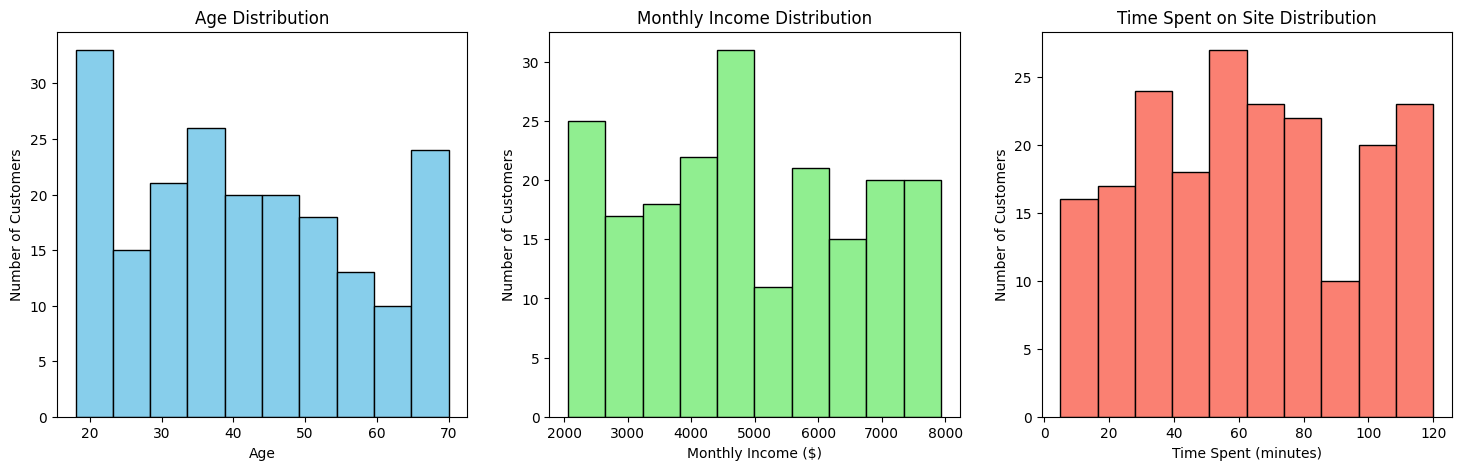

In [ ]:
# Your code here - Create histograms
# Create a figure with 3 subplots
plt.figure(figsize=(18, 5))

# 1. Age distribution
plt.subplot(1, 3, 1)
plt.hist(shopping_data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# 2. Monthly income distribution
plt.subplot(1, 3, 2)
plt.hist(shopping_data['monthly_income'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Number of Customers')

# 3. Time spent distribution
plt.subplot(1, 3, 3)
plt.hist(shopping_data['time_spent_minutes'], bins=10, color='salmon', edgecolor='black')
plt.title('Time Spent on Site Distribution')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


Exercise 3.2: Relationship Plots

Create scatter plots to show relationships between:
- Age vs Monthly Income
- Time Spent vs Pages Visited
- Monthly Income vs Items Purchased

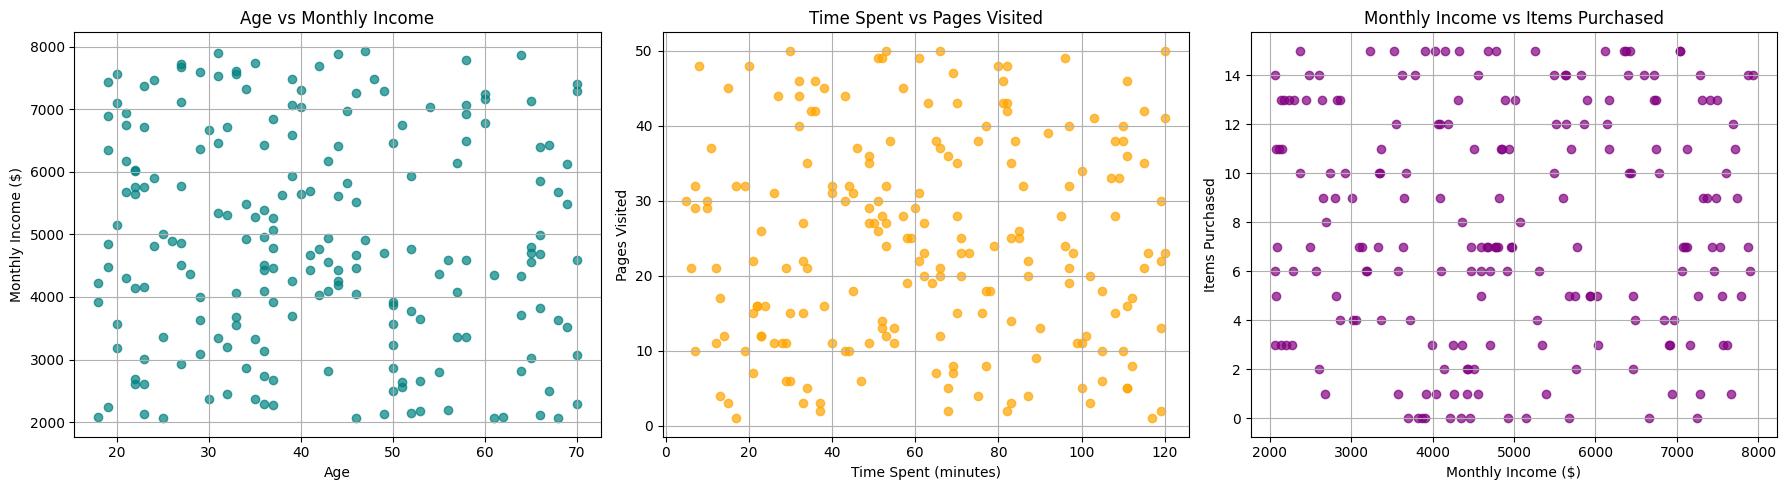

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# 1. Age vs Monthly Income
plt.subplot(1, 3, 1)
plt.scatter(shopping_data['age'], shopping_data['monthly_income'], color='teal', alpha=0.7)
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income ($)')
plt.grid(True)

# 2. Time Spent vs Pages Visited
plt.subplot(1, 3, 2)
plt.scatter(shopping_data['time_spent_minutes'], shopping_data['pages_visited'], color='orange', alpha=0.7)
plt.title('Time Spent vs Pages Visited')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Pages Visited')
plt.grid(True)

# 3. Monthly Income vs Items Purchased
plt.subplot(1, 3, 3)
plt.scatter(shopping_data['monthly_income'], shopping_data['items_purchased'], color='purple', alpha=0.7)
plt.title('Monthly Income vs Items Purchased')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Items Purchased')
plt.grid(True)

plt.tight_layout()
plt.show()


Exercise 3.3: Box Plots

Create box plots to compare:
- Items purchased by age groups (create 3 groups: 18-30, 31-50, 51-70)

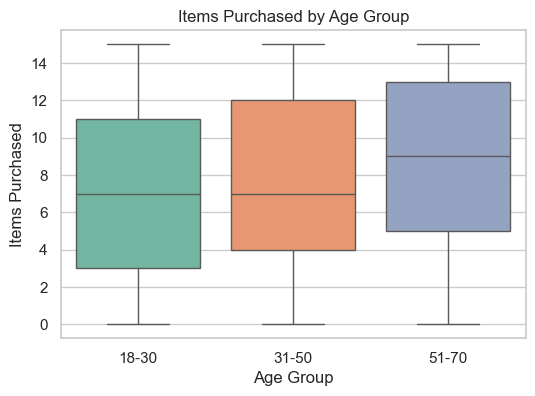

In [42]:
bins = [17, 30, 50, 70]
labels = ['18-30', '31-50', '51-70']

shopping_data['age_group'] = pd.cut(shopping_data['age'], bins=bins, labels=labels)
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.boxplot(data=shopping_data, x='age_group', y='items_purchased', palette='Set2')

plt.title('Items Purchased by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Items Purchased')
plt.show()

### 🔎 4. Pattern Discovery
Let's discover patterns in customer behavior.

Exercise 4.1: High-Value Customer Pattern

Identify customers who might be "high-value" based on:
- Above average income
- Above average time spent
- Above average items purchased

In [50]:
# Calculate averages
avg_income = shopping_data['monthly_income'].mean()
avg_time = shopping_data['time_spent_minutes'].mean()
avg_items = shopping_data['items_purchased'].mean()

# Flag high-value customers
shopping_data['high_value'] = (
    (shopping_data['monthly_income'] > avg_income) &
    (shopping_data['time_spent_minutes'] > avg_time) &
    (shopping_data['items_purchased'] > avg_items)
)


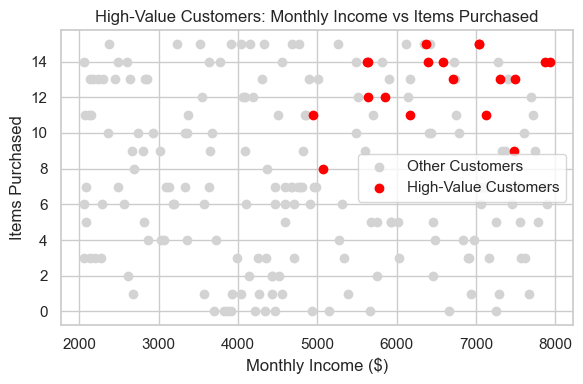

In [52]:
plt.figure(figsize=(6, 4))

high_value = shopping_data[shopping_data['high_value']]
others = shopping_data[~shopping_data['high_value']]
plt.scatter(others['monthly_income'], others['items_purchased'], color='lightgray', label='Other Customers')
plt.scatter(high_value['monthly_income'], high_value['items_purchased'], color='red', label='High-Value Customers')

plt.title('High-Value Customers: Monthly Income vs Items Purchased')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Items Purchased')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Exercise 4.2: Behavioral Patterns

Create a new feature called engagement_score by combining:
- Time spent (normalized)
- Pages visited (normalized)
- Items purchased (normalized)

In [53]:
# Min-max normalization
shopping_data['time_spent_norm'] = (shopping_data['time_spent_minutes'] - shopping_data['time_spent_minutes'].min()) / (shopping_data['time_spent_minutes'].max() - shopping_data['time_spent_minutes'].min())
shopping_data['pages_visited_norm'] = (shopping_data['pages_visited'] - shopping_data['pages_visited'].min()) / (shopping_data['pages_visited'].max() - shopping_data['pages_visited'].min())
shopping_data['items_purchased_norm'] = (shopping_data['items_purchased'] - shopping_data['items_purchased'].min()) / (shopping_data['items_purchased'].max() - shopping_data['items_purchased'].min())

shopping_data['engagement_score'] = (
    shopping_data['time_spent_norm'] +
    shopping_data['pages_visited_norm'] +
    shopping_data['items_purchased_norm']
) / 3  # average score

print(shopping_data[['time_spent_minutes', 'pages_visited', 'items_purchased', 'engagement_score']].head())


   time_spent_minutes  pages_visited  items_purchased  engagement_score
0                  27             44                2          0.400730
1                  49             29                0          0.318012
2                  21              7               15          0.420526
3                 108             28                6          0.615558
4                  89              9                3          0.364567


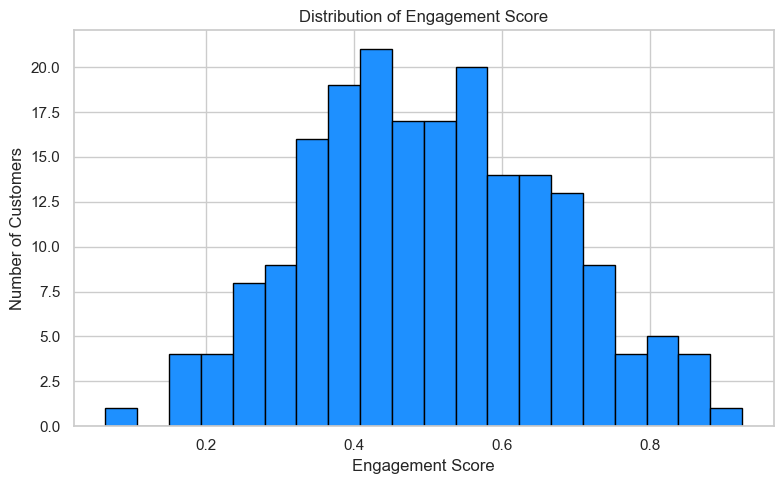

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(shopping_data['engagement_score'], bins=20, color='dodgerblue', edgecolor='black')
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 5. Correlation Analysis

Analyze relationships between different variables.

Exercise 5.1: Correlation Matrix

Calculate and display the correlation matrix for all numerical variables.

In [57]:
corr_matrix = shopping_data.corr(numeric_only=True)

# Display the matrix
print("\nCorrelation Matrix:")
print(corr_matrix.round(2))


Correlation Matrix:
                      customer_id   age  monthly_income  time_spent_minutes  \
customer_id                  1.00 -0.02           -0.02                0.13   
age                         -0.02  1.00           -0.08                0.12   
monthly_income              -0.02 -0.08            1.00                0.07   
time_spent_minutes           0.13  0.12            0.07                1.00   
pages_visited                0.02  0.03           -0.11                0.01   
items_purchased              0.12  0.11            0.01               -0.06   
high_value                   0.02  0.07            0.31                0.34   
time_spent_norm              0.13  0.12            0.07                1.00   
pages_visited_norm           0.02  0.03           -0.11                0.01   
items_purchased_norm         0.12  0.11            0.01               -0.06   
engagement_score             0.16  0.16           -0.01                0.54   

                      pages_vi

Exercise 5.2: Correlation Heatmap

Create a heatmap to visualize the correlations.

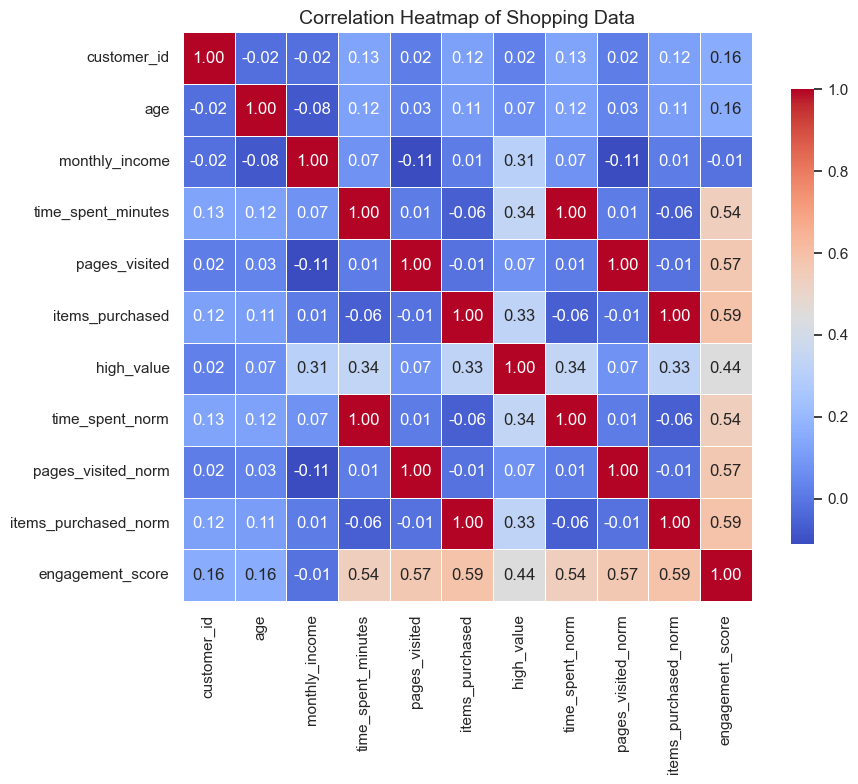

In [58]:
# Your code here - Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # show correlation values
            fmt=".2f",       # 2 decimal places
            cmap="coolwarm", # color gradient
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})  # smaller color bar

plt.title("Correlation Heatmap of Shopping Data", fontsize=14)
plt.tight_layout()
plt.show()


Exercise 5.3: Strong Correlations

Identify pairs of variables with correlation > 0.5 or < -0.5.

In [70]:
# Your code here - Find strong correlations
# Unstack matrix to flatten it (turns into a Series)
corr_pairs = corr_matrix.unstack()

# Remove self-correlations (correlation of a variable with itself is always 1)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (e.g., keep (A, B) but not (B, A))
corr_pairs = corr_pairs.drop_duplicates()

# Filter for strong correlations
strong_corr = corr_pairs[abs(corr_pairs) > 0.5]

# Display result
print("Strong Correlations (>|0.5|):\n")
print(strong_corr.sort_values(ascending=False).round(2))


Strong Correlations (>|0.5|):

time_spent_minutes    time_spent_norm         1.00
pages_visited         pages_visited_norm      1.00
items_purchased       items_purchased_norm    1.00
                      engagement_score        0.59
items_purchased_norm  engagement_score        0.59
pages_visited         engagement_score        0.57
pages_visited_norm    engagement_score        0.57
time_spent_minutes    engagement_score        0.54
dtype: float64


### 🎯 6. Clustering

Group customers based on their behavior.


Exercise 6.1: Prepare Data for Clustering

Select features for clustering (age, monthly_income, time_spent_minutes, pages_visited) and standardize them.

In [61]:
# Your code here - Prepare and standardize data
clustering_features = shopping_data[['age', 'monthly_income', 'time_spent_minutes', 'pages_visited']]
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)
clustering_scaled_df = pd.DataFrame(clustering_scaled, columns=clustering_features.columns)
print(clustering_scaled_df.head())



        age  monthly_income  time_spent_minutes  pages_visited
0 -1.211555       -1.326037           -1.104542       1.412895
1 -0.295445       -0.254632           -0.425868       0.324937
2  1.798520        0.705119           -1.289635      -1.270735
3  1.863957       -1.514631            1.394212       0.252406
4 -1.407865        1.542805            0.808085      -1.125674


Exercise 6.2: K-Means Clustering

Apply K-means clustering with 3 clusters to group customers.

In [63]:
# Your code here - Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # fix random state for reproducibility
kmeans.fit(clustering_scaled)
shopping_data['cluster'] = kmeans.labels_
print(shopping_data['cluster'].value_counts())



cluster
2    93
0    57
1    50
Name: count, dtype: int64


Exercise 6.3: Visualize Clusters

Create a scatter plot showing the clusters using two features of your choice.

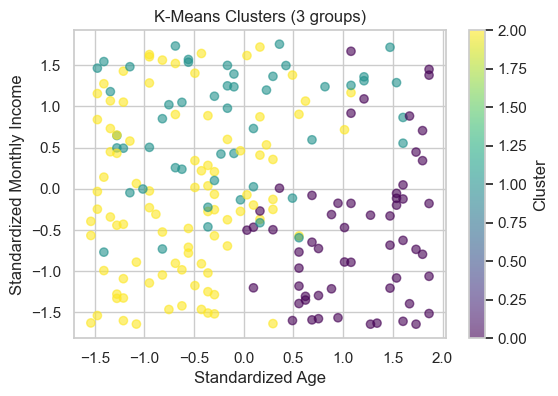

In [66]:
# Your code here - Visualize clusters
plt.figure(figsize=(6, 4))
plt.scatter(clustering_scaled[:, 0], clustering_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Monthly Income')
plt.title('K-Means Clusters (3 groups)')
plt.colorbar(label='Cluster')
plt.show()

### 🔊 7. Noise Assessment

Identify and handle outliers in your data.

Exercise 7.1: Detect Outliers using IQR

Find outliers in the monthly_income column using the Interquartile Range (IQR) method.

Lower Bound: -726.625
Upper Bound: 10720.375
Number of outliers detected: 0

Outliers:
Empty DataFrame
Columns: [customer_id, monthly_income]
Index: []


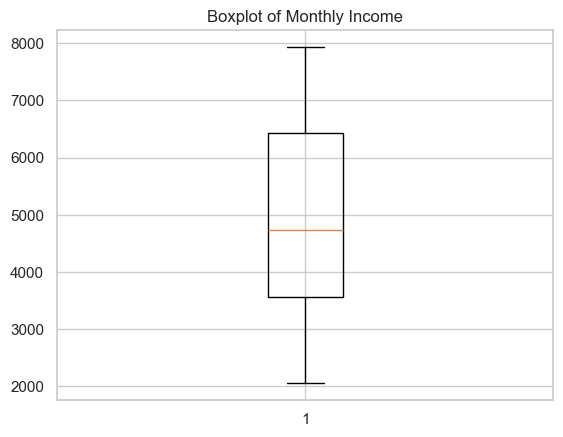

In [67]:
# Your code here - Detect outliers using IQR
Q1 = shopping_data['monthly_income'].quantile(0.25)
Q3 = shopping_data['monthly_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = shopping_data[(shopping_data['monthly_income'] < lower_bound) | (shopping_data['monthly_income'] > upper_bound)]
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers detected: {outliers.shape[0]}")
print("\nOutliers:")
print(outliers[['customer_id', 'monthly_income']])
plt.boxplot(shopping_data['monthly_income'])
plt.title("Boxplot of Monthly Income")
plt.show()


Exercise 7.2: Detect Outliers using Z-score

Find outliers in the time_spent_minutes column using Z-score (consider |z| > 3 as outliers).

Number of outliers detected: 0
Empty DataFrame
Columns: [customer_id, time_spent_minutes, time_spent_zscore]
Index: []


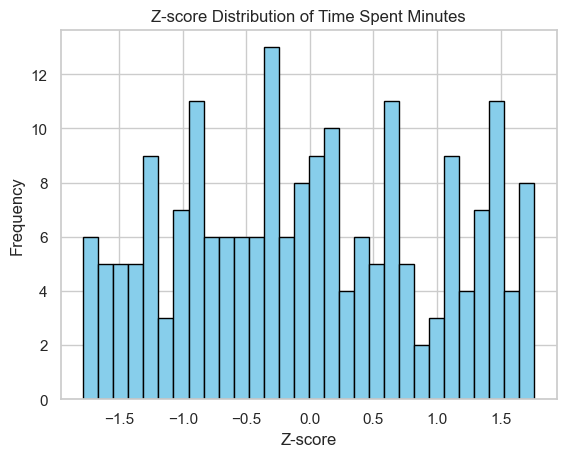

In [71]:
# Your code here - Detect outliers using Z-score
shopping_data['time_spent_zscore'] = zscore(shopping_data['time_spent_minutes'])
outliers_z = shopping_data[shopping_data['time_spent_zscore'].abs() > 3]
print(f"Number of outliers detected: {outliers_z.shape[0]}")
print(outliers_z[['customer_id', 'time_spent_minutes', 'time_spent_zscore']])

plt.hist(shopping_data['time_spent_zscore'], bins=30, color='skyblue', edgecolor='black')
plt.title("Z-score Distribution of Time Spent Minutes")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()

Exercise 7.3: Visualize Outliers

Create box plots to visualize outliers in different numerical columns.

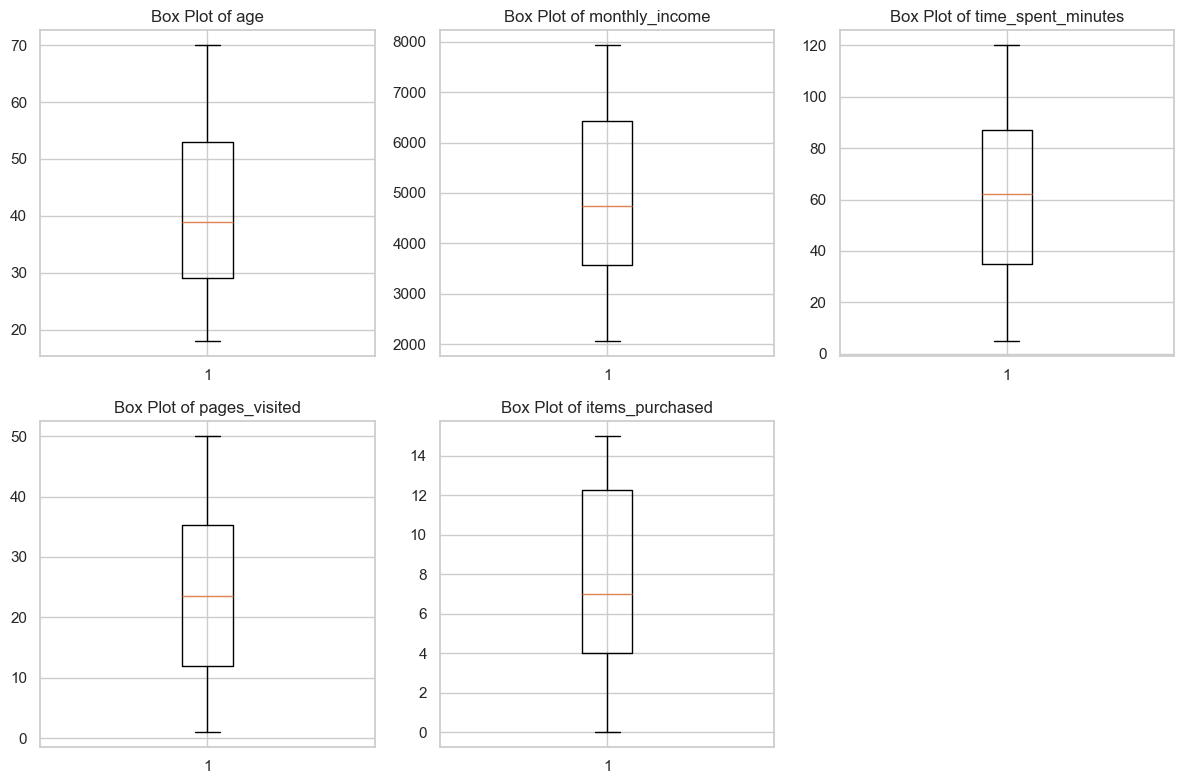

In [72]:
# Your code here - Create box plots for outlier visualization
num_columns = ['age', 'monthly_income', 'time_spent_minutes', 'pages_visited', 'items_purchased']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(shopping_data[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

### 🎉 Congratulations!

You have completed the Day 1 exercises! You've learned to:

✅ Collect and create datasets

✅ Explore data characteristics

✅ Visualize data patterns

✅ Discover behavioral patterns

✅ Analyze correlations

✅ Group customers using clustering

✅ Make predictions with machine learning

✅ Identify and assess noise/outliers

Reflection Questions:
- What was the most interesting pattern you discovered in the data?
- Which customers would you consider most valuable and why?
- How confident are you in your prediction model's results?
- What would you do differently if you had more time?

Write your answers in the cell below:

In [ ]:
# Your reflection answers here (as comments)
# 1. I noticed a strong positive correlation between time spent on the site and items purchased, suggesting that customers who engage longer tend to buy more. Also, the cluster analysis revealed distinct customer groups with varying spending and engagement levels, which can help target marketing efforts better.

# 2. The most valuable customers are those with above-average income, high time spent, and high number of items purchased. These high-value customers contribute the most revenue and show strong engagement, making them prime targets for loyalty programs.
# 3. While the initial models show promise, I am cautiously optimistic. The model’s performance could improve with more features and better tuning. Validation on real-world data would help increase confidence.
# 4. I’d explore more sophisticated feature engineering, try other clustering algorithms (like DBSCAN), and incorporate additional data like customer feedback or purchase categories. Also, I’d build and evaluate classification models to predict customer segments and high-value prospects more accurately.